# How well do jobs and skills pay for Data Analysts?
Methology
* Evaluate median salary for top 6 data jobs
* Find median salary per skill for Data Analysts
* Visualize for highest paying skills and most demanded skills

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

# Load the dataset
data = load_dataset("lukebarousse/data_jobs")

# Convert the train split to a pandas DataFrame
df = data["train"].to_pandas()

# Convert job_posted_date to datetime format
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Convert job_skills from string representation of list to actual list
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
data_roles=df['job_title'].value_counts().index[0:6].tolist()

In [3]:
df_fil=df[(df['job_title_short'].isin(data_roles)) & (df['job_country']=="United States")].dropna(subset="salary_year_avg").copy()

In [4]:
plot=df_fil.groupby(["job_title_short"])["salary_year_avg"].median().reset_index()

In [5]:
job_order=df_fil.groupby(["job_title_short"])["salary_year_avg"].median().sort_values(ascending= False).index.tolist()

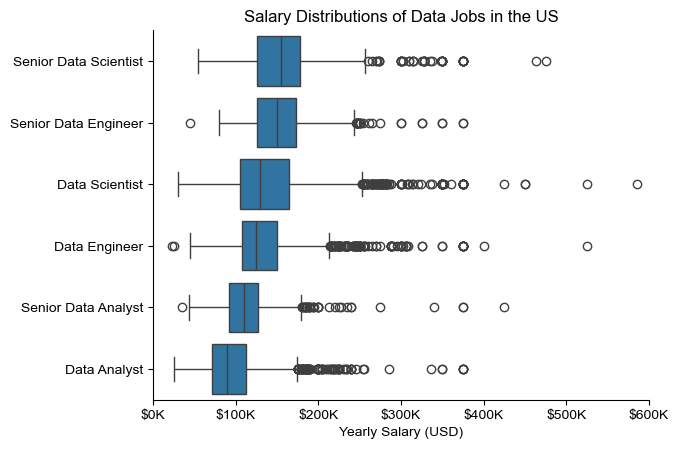

In [6]:
sns.boxplot(data=df_fil,x='salary_year_avg',y="job_title_short",order=job_order)
sns.set_theme(style='ticks')
sns.despine()
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [13]:
df_DA_US=df[(df['job_title_short']=="Data Analyst") & (df['job_country']=="United States")].dropna(subset='salary_year_avg').copy()

In [15]:
df_DA_US_exploded=df_DA_US.explode('job_skills')

In [17]:
plot2=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).reset_index().head()

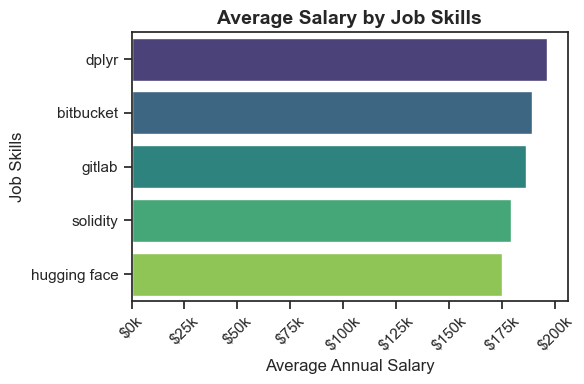

In [19]:
plt.figure(figsize=(6, 4))  
sns.barplot(data=plot2, y='job_skills', x='salary_year_avg', hue = 'job_skills',palette="viridis")

# Format the x-axis to show salary in thousands with a dollar sign
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))

# Add titles and labels
plt.title("Average Salary by Job Skills", fontsize=14, weight='bold')
plt.xlabel("Average Annual Salary", fontsize=12)
plt.ylabel("Job Skills", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


In [21]:
by_count=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by="count",ascending=False).head(10)

In [23]:
by_median=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by="median",ascending=False).head(10)

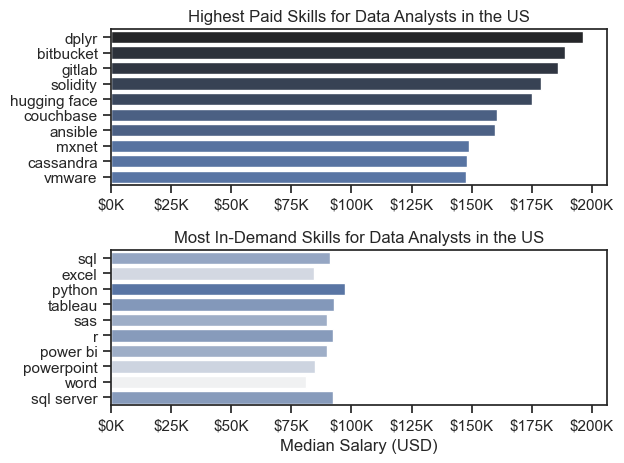

In [25]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=by_median, x='median', y=by_median.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=by_count, x='median', y=by_count.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()